1. Importing the libraries

In [31]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os, my_eda_functions

Setting up display options

In [32]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

2. Reading the data

In [33]:
PROJECT_DIR  = "/Users/abhisheksaurav/Desktop/real_estate_project/"
DATA_DIR = "Data Collection/Data/City/chandigarh/cleaned_data"

In [34]:
def get_data(name):
    file_name = "{}.csv".format(name)
    file_path = os.path.join(PROJECT_DIR, DATA_DIR, file_name)
    return pd.read_csv(file_path)

In [35]:
data = get_data("gurgaon_properties")

In [36]:
data.sample(3)

,property type,society,sector,price,price_per_sq_ft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
3415,house,unitech escape,sector 50,12.00,37037.0,5.0,6,3+,3.0,Moderately Old,3240.0,0,0,0,0,0,0,66
2440,flat,ild grand,sector 37,1.35,7143.0,3.0,3,No,1.0,New Property,1820.0,0,0,0,0,0,0,60
2108,flat,m3m woodshire,sector 107,0.98,6422.0,2.0,2,3,7.0,Relatively New,1281.0,1,0,0,0,0,2,174


In [37]:
train_df = data.drop(columns = ['society', 'price_per_sq_ft'])

<Axes: >

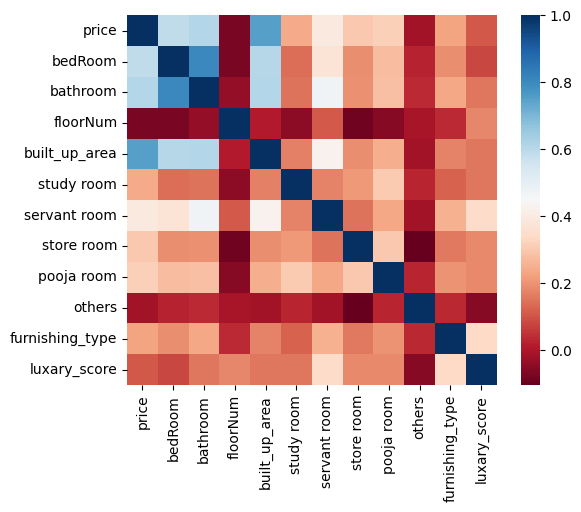

In [38]:
sns.heatmap(train_df.corr(numeric_only= True), 
            square= True, 
            cmap= "RdBu")

In [39]:
train_df.corr(numeric_only= True)['price'].sort_values(ascending= False)

price              1.000000
built_up_area      0.751177
bathroom           0.610325
bedRoom            0.590460
servant room       0.395503
pooja room         0.318924
store room         0.299603
study room         0.238872
furnishing_type    0.224874
luxary_score       0.107441
others            -0.015771
floorNum          -0.074762
Name: price, dtype: float64

Observation: 
1. `built_up_area`, `bathroom`, `bedRoom` shows a strong linear relationship with the `price`. 
2. we need to gather more evidence about the `floorNum`, `luxary_score` and `others` that they are having linear relationship with the `price` variable or not. 
3. We need to study the relationship of the categorical variables like `property type`, `sector` and `agePossession` have relationship with `price` or not. 
4. Numerical variables like `floorNum` and `luxary_score` can be transformed into to `categorical variable` using the binning technique. 

Luxary Score

<Axes: xlabel='luxary_score'>

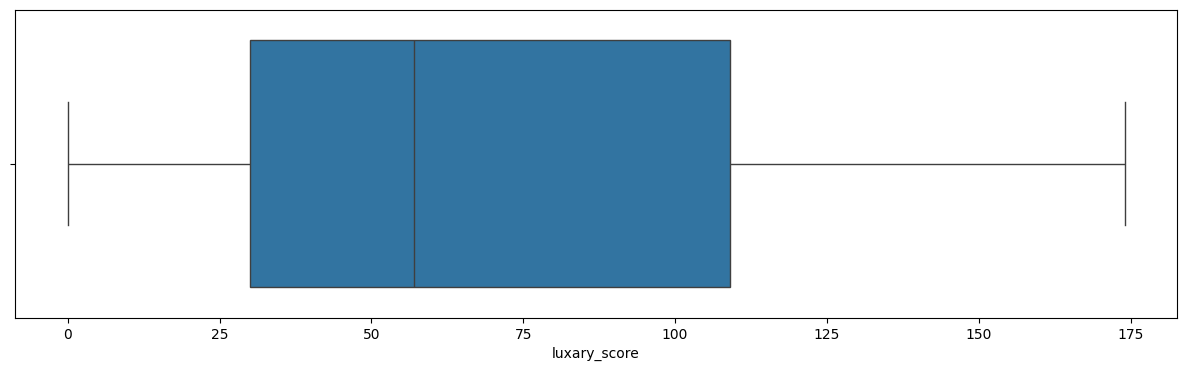

In [40]:
plt.figure(figsize= (15, 4))
sns.boxplot(data['luxary_score'], orient= 'h')

Based on the boxplot we will divide the luxary_score into different categories. 
- Luxary score 0 to 50: `Low`
- Luxary score 50 to 150: `Medium`
- Luxary score 150 to 175: `High`

In [41]:
def categorize_luxary(score):
    if 0 >= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <175: 
        return "High"
    else:
        return None 
    
train_df['luxary_category'] = train_df['luxary_score'].apply(categorize_luxary)

In [42]:
train_df.sample(3)

,property type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score,luxary_category
1189,flat,sector 67,1.85,3.0,4,3,4.0,New Property,1941.0,1,0,1,0,0,2,150,High
2063,flat,sector 85,1.05,2.0,2,3,11.0,Relatively New,1484.0,0,0,0,0,0,0,44,None
1773,flat,sector 60,2.12,2.0,2,2,2.0,Relatively New,1350.0,0,0,0,1,0,2,174,High


floorNum

In [43]:
def categorise_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor" 
    elif 3 <= floor <= 10:
        return "Medium Floor" 
    elif floor >= 11:
        return "High Floor"
    else: 
        return None 

train_df['floor_category'] = train_df['floorNum'].apply(categorise_floor)

- Dropping the `luxary_score` and `floorNum` as we have already categorised them> 

In [44]:
train_df.drop(columns = ["luxary_score", "floorNum"], inplace = True)

In [45]:
train_df.sample(3)

,property type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_category,floor_category
602,house,sector 109,11.25,7.0,5,3+,Relatively New,4500.0,1,1,0,1,0,0,None,Medium Floor
1230,flat,sector 107,1.80,3.0,4,3+,Relatively New,1837.0,0,1,0,0,0,0,Medium,Low Floor
1296,house,sector 3,0.60,3.0,3,1,Old Property,57.0,0,0,0,0,1,0,Low,Low Floor


- Now we need to convert the categorical columns to the numerical, ie. we need to perform encoding

In [46]:
from sklearn.preprocessing import OrdinalEncoder

# creating a copy of original data to encoded data 

data_label_encoded = train_df.copy()

cat_cols = train_df.select_dtypes(include= "O").columns.to_list()

for cols in cat_cols:
    oe = OrdinalEncoder()
    data_label_encoded[cols] = oe.fit_transform(data_label_encoded[[cols]])
    print(oe.categories_)

X_label = data_label_encoded.drop("price", axis = 1)
y_label = data_label_encoded["price"]

[array(['flat', 'house'], dtype=object)]
[array(['sector 1', 'sector 10', 'sector 101', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 11', 'sector 110',
       'sector 111', 'sector 112', 'sector 113', 'sector 12', 'sector 13',
       'sector 14', 'sector 15', 'sector 163', 'sector 17', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 29', 'sector 3',
       'sector 30', 'sector 31', 'sector 32', 'sector 33', 'sector 35',
       'sector 36', 'sector 37', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 42', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector

In [47]:
data_label_encoded.sample(10)

,property type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_category,floor_category
1247,0.0,0.0,0.91,3.0,3,3.0,0.0,1900.0,0,1,0,0,0,0,3.0,2.0
3787,1.0,38.0,0.75,3.0,1,4.0,1.0,1081.0,0,0,0,0,0,0,1.0,1.0
132,0.0,0.0,0.85,3.0,3,1.0,0.0,2556.0,0,0,0,0,0,0,3.0,1.0
617,1.0,36.0,9.55,6.0,7,3.0,3.0,4950.0,1,1,1,1,0,2,2.0,1.0
2179,0.0,6.0,0.95,2.0,2,0.0,1.0,4000.0,0,0,0,0,1,0,1.0,1.0
834,0.0,94.0,0.92,3.0,3,1.0,3.0,2167.0,1,0,0,0,0,2,3.0,2.0
2595,1.0,30.0,13.00,10.0,10,3.0,0.0,8056.0,0,0,0,0,0,0,1.0,1.0
458,0.0,26.0,3.00,3.0,4,2.0,0.0,2778.0,0,0,0,0,0,0,1.0,1.0
2680,0.0,20.0,0.30,2.0,2,1.0,3.0,743.0,0,0,0,0,0,0,1.0,2.0
1763,1.0,55.0,8.00,6.0,5,3.0,0.0,3132.0,0,0,0,0,0,0,1.0,2.0


In [48]:
X_label.sample(3)

,property type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_category,floor_category
838,0.0,8.0,3.0,4,3.0,3.0,1900.0,0,1,0,0,0,0,2.0,2.0
2714,1.0,83.0,4.0,4,1.0,2.0,1935.0,0,1,1,1,0,0,3.0,1.0
1959,0.0,72.0,3.0,3,1.0,3.0,1392.0,0,0,0,1,0,2,0.0,0.0


In [49]:
y_label.sample(3)

835     1.55
2534    0.89
3654    1.21
Name: price, dtype: float64

Technique 1: Correlation Analysis

<Axes: >

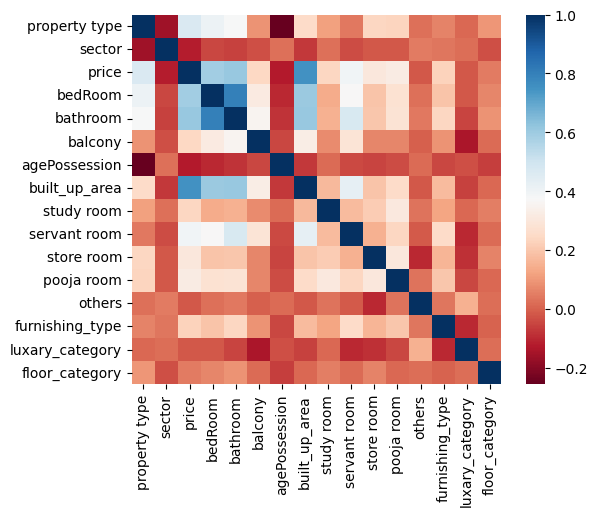

In [50]:
sns.heatmap(
    data_label_encoded.corr(numeric_only=True), 
    cmap = 'RdBu', 
    square= True
)

In [129]:
fi_df1 = (
    data_label_encoded.corr(numeric_only=True)['price']
    .iloc[1:]
    .to_frame()
    .reset_index()
    .rename(columns = {"index": 'Features', "price": "Correlation Coeff"})
    .sort_values(by = "Correlation Coeff", ascending= False)
)

fi_df1

,Features,Correlation Coeff
1,price,1.000000
6,built_up_area,0.751177
3,bathroom,0.610325
2,bedRoom,0.590460
8,servant room,0.395503
10,pooja room,0.318924
9,store room,0.299603
4,balcony,0.240523
7,study room,0.238872
12,furnishing_type,0.224874


Technique 2: Random Forest Feature Importance

In [52]:
from sklearn.ensemble import RandomForestRegressor

# train a random forest regressor on the encoded data 

rf_label = RandomForestRegressor(n_estimators= 100, random_state= 42)
rf_label.fit(X_label, y_label)

# extracting feature importance scores for label encoded data 

fi_df2 = (
    pd 
    .DataFrame(
        {"Features": X_label.columns,
         "rf_importance": rf_label.feature_importances_}
    )
    .sort_values(by = 'rf_importance', ascending= False)
)

fi_df2

,Features,rf_importance
6,built_up_area,0.658785
0,property type,0.093166
1,sector,0.090122
2,bedRoom,0.029650
3,bathroom,0.026763
8,servant room,0.018616
5,agePossession,0.016217
4,balcony,0.013599
13,luxary_category,0.011448
7,study room,0.009555


Technique 3: Gradient Boosting Feature Importance 

In [53]:
from sklearn.ensemble import GradientBoostingRegressor 

gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

fi_df3 = (
    pd 
    .DataFrame(
        {"Features" : X_label.columns, 
         "gb_importance": gb_label.feature_importances_}
    )
    .sort_values(by = "gb_importance", ascending= False)
)

fi_df3

,Features,gb_importance
6,built_up_area,0.688989
0,property type,0.096542
1,sector,0.092333
3,bathroom,0.035400
2,bedRoom,0.033269
8,servant room,0.027982
9,store room,0.007445
5,agePossession,0.005709
7,study room,0.003229
4,balcony,0.002938


Technique 4: Permutation Importance

In [54]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size= 0.2, random_state= 42)

# Traininga random forest regressor model on the encoded data 

rf_label = RandomForestRegressor(n_estimators= 100, random_state= 42)
rf_label.fit(X_train_label, y_train_label)

# calculating feature importance 

perm_importance = permutation_importance(rf_label, 
                                         X_test_label, 
                                         y_test_label, 
                                         n_repeats= 30, 
                                         random_state= 42)

fi_df4 = (
    pd 
    .DataFrame(
        {"Features": X_label.columns, 
         "permutaion_importance" : perm_importance.importances_mean}
    )
    .sort_values(by = 'permutaion_importance', ascending= False)
)

fi_df4

,Features,permutaion_importance
6,built_up_area,0.723779
0,property type,0.206648
1,sector,0.094258
2,bedRoom,0.033332
8,servant room,0.019465
3,bathroom,0.010991
7,study room,0.007272
4,balcony,0.006572
9,store room,0.004682
14,floor_category,0.003542


Technique 5: LASSO

In [55]:
from sklearn.linear_model import Lasso 
from sklearn.preprocessing import StandardScaler


# Standardize the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a lasso regression model 
lasso = Lasso(alpha = 0.01, random_state= 42)
lasso.fit(X_scaled, y_label)

# Extracting coefficients 

fi_df5 = (
    pd 
    .DataFrame(
        {"Features": X_label.columns, 
         "lasso_coeff": lasso.coef_}
    )
    .sort_values(by = "lasso_coeff", ascending= False)
)

fi_df5

,Features,lasso_coeff
6,built_up_area,1.529195
0,property type,0.656662
3,bathroom,0.278570
9,store room,0.202087
8,servant room,0.163797
7,study room,0.162435
12,furnishing_type,0.140433
13,luxary_category,0.084186
10,pooja room,0.066838
2,bedRoom,0.042362


Technique 6: RFE 

In [118]:
from sklearn.feature_selection import RFE 

# Initializing the base estimator 

estimator = RandomForestRegressor()

# Applying RFE on label encoded and standardized data 

selector_label = RFE(estimator, n_features_to_select= X_label.shape[1], step= 1)
selector_label = selector_label.fit(X_label, y_label)

# Getting the feature importance based on RFE 
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model 
selected_coefficients = selector_label.estimator_.feature_importances_

# Organising the results into the dataframe 

fi_df6 = (
    pd 
    .DataFrame(
        {"Features": X_label.columns, 
         "RFE Score" : selected_coefficients}
    )
    .sort_values(by = "RFE Score", ascending= False)
)

fi_df6

,Features,RFE Score
6,built_up_area,0.657023
0,property type,0.095056
1,sector,0.092162
2,bedRoom,0.028942
3,bathroom,0.027205
8,servant room,0.019927
5,agePossession,0.015481
4,balcony,0.013652
13,luxary_category,0.011673
9,store room,0.009432


- RFE is the best feature selection technique, with reliable results.

Technique 7: Linear regression weights 

In [109]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_scaled, y_label)

# Extracting feature importance 

fi_df7 = (
    pd 
    .DataFrame(
        {"Features": X_label.columns, 
         "Reg Coeff": lin_reg.coef_}
    )
    .sort_values(by = "Reg Coeff", ascending= False)
)

fi_df7

# since we have used ordinal encoding tree based models are more reliable 

,Features,Reg Coeff
6,built_up_area,1.532307
0,property type,0.659337
3,bathroom,0.283507
9,store room,0.206349
8,servant room,0.170284
7,study room,0.169534
12,furnishing_type,0.147640
13,luxary_category,0.095963
10,pooja room,0.068637
2,bedRoom,0.044310


Technique 8: SHAP

In [59]:
import shap 

rf = RandomForestRegressor(n_estimators= 100, random_state= 42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# summing the absolute shap values across all samples to get the overall feature importance 

shap_sum = np.abs(shap_values).mean(axis = 0)
shap_values

array([[ 1.42455896,  0.25310522,  0.11057742, ...,  0.05678751,
         0.13649522,  0.00687796],
       [ 0.7901274 , -0.22249479,  0.06213832, ..., -0.02526022,
        -0.14790312,  0.02358657],
       [ 2.21544772,  0.74955027,  0.24877399, ...,  0.11259014,
         0.11220696,  0.06042017],
       ...,
       [ 1.23990953, -0.1036754 , -0.13060577, ..., -0.06870346,
        -0.11511343,  0.01400166],
       [-0.20493223, -0.21823118, -0.02127687, ..., -0.01505773,
        -0.04229658, -0.02906227],
       [-0.37390246, -0.58230486, -0.03023079, ..., -0.03529464,
         0.00894761, -0.01042192]])

In [60]:
shap_sum = np.abs(shap_values).mean(axis = 0)
fi_df8 = (
    pd 
    .DataFrame(
        {
            "Features": X_label.columns, 
            "SHAP Score": shap_sum
        }
    )
    .sort_values(by = "SHAP Score", ascending = False)
)

fi_df8

,Features,SHAP Score
6,built_up_area,1.242114
0,property type,0.455583
1,sector,0.310546
3,bathroom,0.110395
8,servant room,0.098375
2,bedRoom,0.070723
13,luxary_category,0.038339
5,agePossession,0.029285
12,furnishing_type,0.028808
4,balcony,0.028161


Merging all the feature importance dataframes 

In [90]:
fi_df6.shape

(15, 2)

In [89]:
fi_df7.shape

(15, 2)

In [119]:
(
    fi_df1
    .merge(fi_df2, on = "Features")
    .merge(fi_df3, on = "Features")
    .merge(fi_df4, on = "Features")
    .merge(fi_df5, on = "Features")
    .merge(fi_df6, on = "Features")
    .merge(fi_df7, on = "Features")
    .merge(fi_df8, on = "Features")
    .set_index("Features")
)

,Correlation Coeff,rf_importance,gb_importance,permutaion_importance,lasso_coeff,RFE Score,Reg Coeff,SHAP Score
Features,,,,,,,,
built_up_area,0.751177,0.658785,0.688989,0.723779,1.529195,0.657023,1.532307,1.242114
bathroom,0.610325,0.026763,0.035400,0.010991,0.278570,0.027205,0.283507,0.110395
bedRoom,0.590460,0.029650,0.033269,0.033332,0.042362,0.028942,0.044310,0.070723
property type,0.467840,0.093166,0.096542,0.206648,0.656662,0.095056,0.659337,0.455583
servant room,0.395503,0.018616,0.027982,0.019465,0.163797,0.019927,0.170284,0.098375
pooja room,0.318924,0.006255,0.000009,0.001652,0.066838,0.005753,0.068637,0.008897
store room,0.299603,0.008232,0.007445,0.004682,0.202087,0.009432,0.206349,0.020667
balcony,0.240523,0.013599,0.002938,0.006572,-0.077531,0.013652,-0.093488,0.028161
study room,0.238872,0.009555,0.003229,0.007272,0.162435,0.007239,0.169534,0.019622


In [130]:
final_fi_df = (
    fi_df1
    .merge(fi_df2, on = "Features")
    .merge(fi_df3, on = "Features")
    .merge(fi_df4, on = "Features")
    .merge(fi_df5, on = "Features")
    .merge(fi_df6, on = "Features")
    .merge(fi_df7, on = "Features")
    .merge(fi_df8, on = "Features")
    .set_index("Features")
)

final_fi_df

,Correlation Coeff,rf_importance,gb_importance,permutaion_importance,lasso_coeff,RFE Score,Reg Coeff,SHAP Score
Features,,,,,,,,
built_up_area,0.751177,0.658785,0.688989,0.723779,1.529195,0.657023,1.532307,1.242114
bathroom,0.610325,0.026763,0.035400,0.010991,0.278570,0.027205,0.283507,0.110395
bedRoom,0.590460,0.029650,0.033269,0.033332,0.042362,0.028942,0.044310,0.070723
servant room,0.395503,0.018616,0.027982,0.019465,0.163797,0.019927,0.170284,0.098375
pooja room,0.318924,0.006255,0.000009,0.001652,0.066838,0.005753,0.068637,0.008897
store room,0.299603,0.008232,0.007445,0.004682,0.202087,0.009432,0.206349,0.020667
balcony,0.240523,0.013599,0.002938,0.006572,-0.077531,0.013652,-0.093488,0.028161
study room,0.238872,0.009555,0.003229,0.007272,0.162435,0.007239,0.169534,0.019622
furnishing_type,0.224874,0.007696,0.002188,-0.004608,0.140433,0.007410,0.147640,0.028808


In [131]:
# normalizing the features 

final_fi_df = final_fi_df.divide(final_fi_df.sum(axis = 0), axis= 1)
final_fi_df

,Correlation Coeff,rf_importance,gb_importance,permutaion_importance,lasso_coeff,RFE Score,Reg Coeff,SHAP Score
Features,,,,,,,,
built_up_area,0.218514,0.726467,0.762613,0.808378,0.618767,0.726036,0.622165,0.609714
bathroom,0.177541,0.029512,0.039183,0.012276,0.112720,0.030063,0.115113,0.054189
bedRoom,0.171762,0.032697,0.036824,0.037228,0.017141,0.031982,0.017991,0.034715
servant room,0.115050,0.020528,0.030973,0.021740,0.066278,0.022020,0.069141,0.048289
pooja room,0.092774,0.006898,0.000010,0.001845,0.027045,0.006357,0.027869,0.004367
store room,0.087153,0.009078,0.008241,0.005229,0.081772,0.010423,0.083784,0.010145
balcony,0.069967,0.014996,0.003252,0.007340,-0.031372,0.015086,-0.037959,0.013823
study room,0.069487,0.010537,0.003574,0.008122,0.065727,0.007999,0.068836,0.009632
furnishing_type,0.065415,0.008487,0.002421,-0.005146,0.056824,0.008188,0.059946,0.014141


In [132]:
(
    final_fi_df[['rf_importance', 'gb_importance', 'permutaion_importance',  'RFE Score', 'SHAP Score']]
    .mean(axis = 1)
    .sort_values(ascending = False)
    )

Features
built_up_area      0.726642
sector             0.112227
bedRoom            0.034689
bathroom           0.033045
servant room       0.028710
agePossession      0.011215
balcony            0.010899
store room         0.008623
luxary_category    0.008141
study room         0.007973
floor_category     0.006208
furnishing_type    0.005618
pooja room         0.003895
others             0.002114
dtype: float64

- Since `Pooja Room`, `study room` and `others` have constantly having low feature importance we will drop these columns. 
- But before dropping these columsn we will perform a tree based model to check if dropping them will affect our model or not, if it doesn't then i will drop them. 

In [138]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators= 100, random_state= 42)

score = cross_val_score(rf, X_label, y_label, cv = 5, scoring= "r2")

score.mean()

np.float64(0.7942587159788848)

In [139]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators= 100, random_state= 42)

score = cross_val_score(rf, X_label.drop(columns = ["pooja room", "others", "study room"]), y_label, cv = 5, scoring= "r2")

score.mean()

np.float64(0.7981801657770242)

Exporting the post feature selection dataset 

In [143]:
export_df = X_label.drop(columns = ["pooja room", "others", "study room"])
export_df['price'] = y_label
export_df.shape

(3807, 13)

In [144]:
dir_path = "/Users/abhisheksaurav/Desktop/real_estate_project/Data Collection/Data/City/chandigarh/cleaned_data"
file_name = "gurgaon_properties_post_feature_selection"
export_df.to_csv("{}/{}.csv".format(dir_path, file_name), index = False)